The corr() method will actually get rid of the columns that are not suitable for correlation for you. if you wanted less categories in the heat map, then we can select only those columns.

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from vega_datasets import data

In [2]:
!pip3 install vega_datasets

In [3]:
cars= data.cars()
cars

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [4]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [5]:
cars.columns

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [6]:
cars = cars[[ 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration']]
cars.head()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


In [7]:
cars.corr()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
Miles_per_Gallon,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
Cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452
Displacement,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984
Horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124
Weight_in_lbs,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086
Acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000


    Signature: cars.corr(method ='pearson',min_periods=1)
    Docstring:
    Computer pairwaise correlation of columns, excluding NA/null values.
    
    Parameters:
    method : {'pearson', 'kendall', 'spearman'} or callable
    * pearson : standard orrelations coefficient
    * kendall : Kendall Tau correlations coefficient
    * spearman: Spearman rank correlation
    * callable: callable with input two 1D nd arrays and
        returning a float
      .. versiona added :: .024.0


# Seaborn Correlation Heatmap

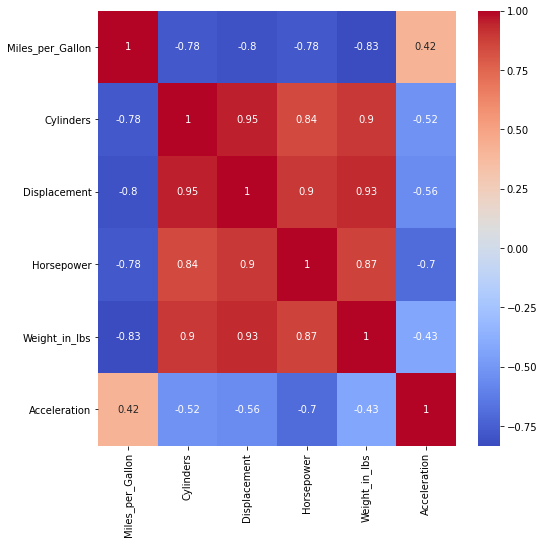

In [9]:
plt.figure(figsize=(8,8))
seaborn.heatmap(cars.corr(), annot=True, cmap="coolwarm")
plt.show()

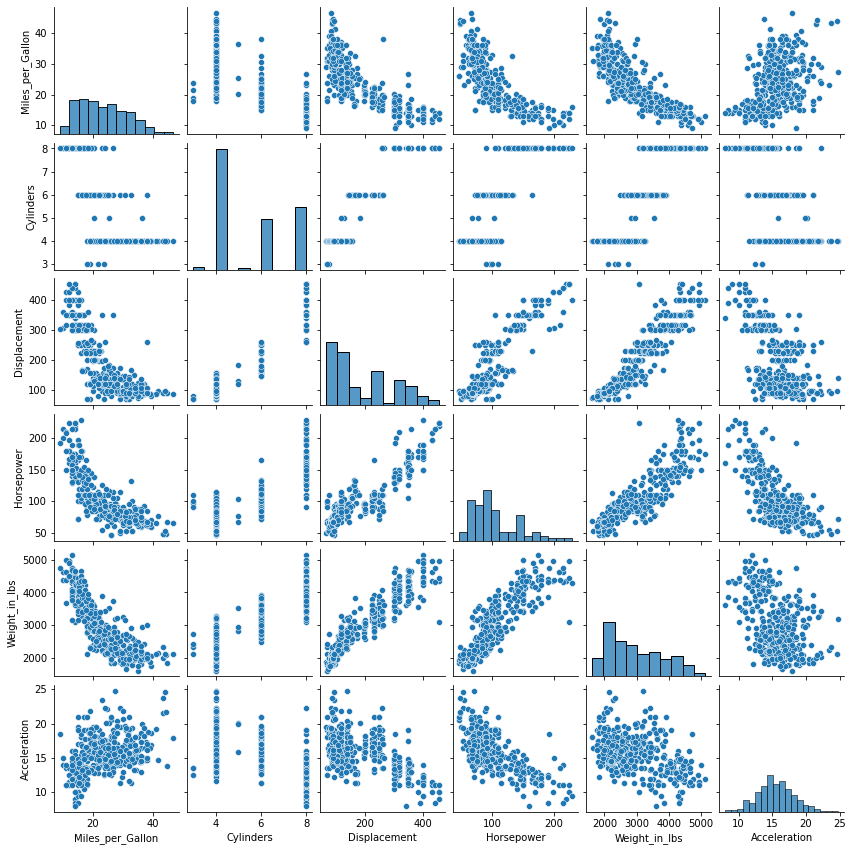

In [11]:
cars_pairplot = cars.dropna()
cars_pairplot.to_excel('cars.xlsx')
seaborn.pairplot(cars_pairplot, height = 2)